In [ ]:
%pip install -U scikit-learn

In [67]:
from xgboost import XGBClassifier, XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = [10, 10]

In [68]:
DATA = "C:/Users/Jonas/ntnu_5/tdt13_nlp/aclImdb/dataset_sentiment"

def rating_to_xgb(rating):
    rating -= 1
    return rating

def xgb_to_rating(rating):
    rating += 1
    return rating

train_df = pd.read_csv(f"{DATA}/train.csv", delimiter="█")
test_df = pd.read_csv(f"{DATA}/test.csv", delimiter="█")
val_df = pd.read_csv(f"{DATA}/validation.csv", delimiter="█")

X_train, y_train = (train_df.iloc[:,2:]), train_df["labels"]#.apply(rating_to_xgb)
X_test, y_test = (test_df.iloc[:,2:]), test_df["labels"]#.apply(rating_to_xgb)
X_val, y_val = (val_df.iloc[:,2:]), val_df["labels"]#.apply(rating_to_xgb)

evalset = [(X_train, y_train), (X_val, y_val)]

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24560\297795026.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv(f"{DATA}/train.csv", delimiter="█")
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24560\297795026.py:5: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv(f"{DATA}/test.csv", delimiter="█")
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24560\297795026.py:6: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  val_df = pd.read_csv(f"

## XGBOOST kfold

In [90]:
# create model instance
xgbreg = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, objective="reg:squarederror")
xgbclass = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.1, objective='multi:softmax', num_class=10)

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(xgbreg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
# fit model
#bst.fit(X_train, y_train)

## RFC kfold

In [70]:
""" cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgbreg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
scores """

KeyboardInterrupt: 

In [ ]:
scores = abs(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean RMSE: 2.075 (0.025)


In [ ]:
# Fit model
xgbreg.fit(X_train, y_train, eval_metric="rmse", eval_set=evalset)

In [ ]:
# make predictions
preds = xgbreg.predict(X_test)

results = pd.concat([pd.DataFrame(preds, columns=["preds"]), y_test], axis=1)
results

,preds,labels
0,8.787439,9
1,4.784188,1
2,6.215729,6
3,8.624251,8
4,2.288009,1
...,...,...
9903,8.187111,8
9904,1.731077,1
9905,4.597358,2
9906,5.155737,5


In [ ]:

# print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds_discrete)))

def acc_score(y_test, y_pred, tolerance):
    y_test = y_test.to_numpy()
    total = len(y_test)
    correct = 0

    for i in range(len(y_pred)):
        if abs(y_pred[i] - y_test[i]) <= tolerance:
            correct += 1
    
    return correct/total

def tolerance_acc_score(y_test, y_pred):
    y_test = y_test.to_numpy()
    total = len(y_test)
    correct = 0
    tolerance = 1

    for i in range(len(y_pred)):
        if abs(round(y_pred[i]) - y_test[i]) <= tolerance:
            correct += 1
    
    return correct/total

print(acc_score(y_test, preds, 0.5))
print(tolerance_acc_score(y_test, preds))

0.19731530076705692
0.5102947113443682


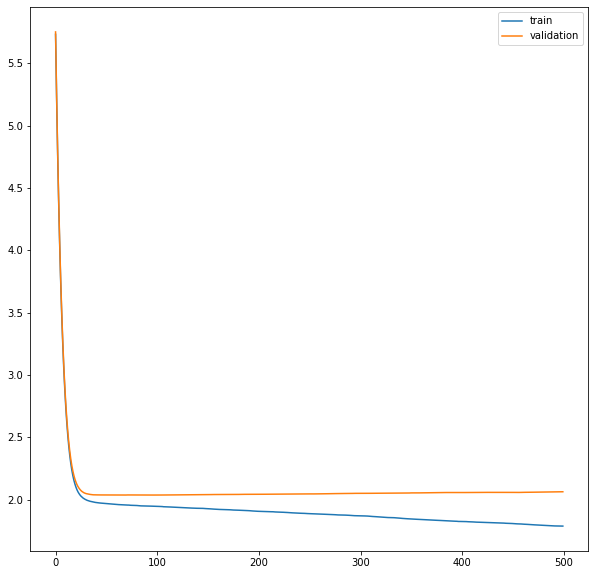

In [79]:
from matplotlib import pyplot

eval_results = xgbreg.evals_result()

# plot learning curves
pyplot.plot(eval_results['validation_0']['rmse'], label='train')
pyplot.plot(eval_results['validation_1']['rmse'], label='validation')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

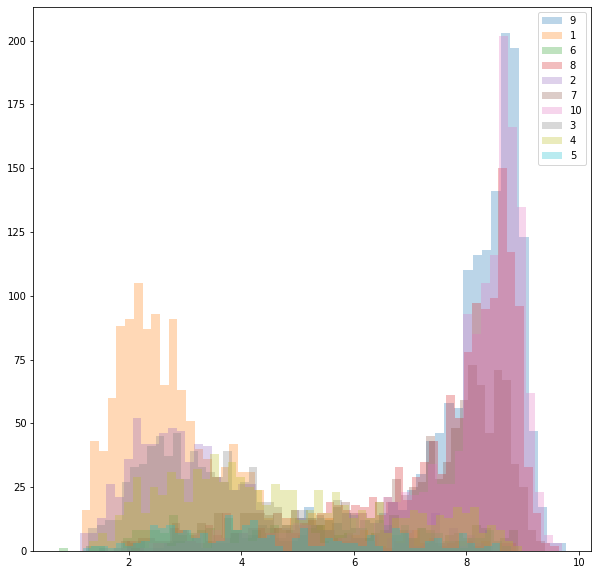

In [ ]:
# Histogram
import numpy as np
from collections import defaultdict

preds_for_rating = defaultdict(list)

for p, r in zip(preds, y_test):
    preds_for_rating[r].append(p)

#print(preds_for_rating.values())
#plt.plot(preds_for_rating.keys(), preds_for_rating.values())

legend = []

for true_r, pred_rs in preds_for_rating.items():
    plt.hist(pred_rs, bins = 50, alpha = 0.3)
    legend.append(str(true_r))

plt.legend(legend)
plt.show()


In [95]:
# XBGClassifier implementation

# Convert data to class labels 0-9
X_train, y_train = (train_df.iloc[:,2:]), train_df["labels"].apply(rating_to_xgb)
X_test, y_test = (test_df.iloc[:,2:]), test_df["labels"].apply(rating_to_xgb)
X_val, y_val = (val_df.iloc[:,2:]), val_df["labels"].apply(rating_to_xgb)

In [96]:
xgbclass = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.1, objective='multi:softmax', num_class=10)

""" cv_clf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_clf = cross_val_score(xgbreg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv_clf, n_jobs=-1) """

' cv_clf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)\nscores_clf = cross_val_score(xgbreg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv_clf, n_jobs=-1) '

In [ ]:
scores_clf = abs(scores_clf)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean RMSE: 2.075 (0.025)


In [ ]:
# fit model
evalset_clf = [(X_train, y_train), (X_val, y_val)]

xgbclass.fit(X_train, y_train, eval_metric="merror", eval_set=evalset_clf)

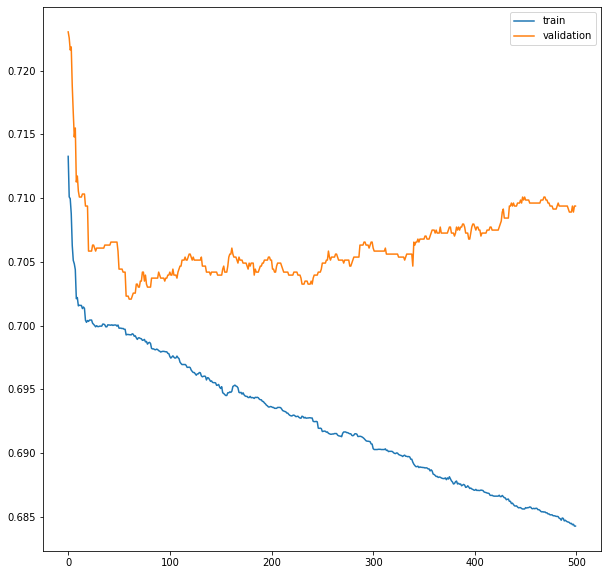

In [98]:

eval_results = xgbclass.evals_result()

# plot learning curves
pyplot.plot(eval_results['validation_0']['merror'], label='train')
pyplot.plot(eval_results['validation_1']['merror'], label='validation')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# make predictions
preds_clf = xgbclass.predict(X_test)

In [ ]:
results_clf = pd.concat([pd.DataFrame(preds_clf, columns=["preds"]), y_test], axis=1)
results_clf

,preds,labels
0,6,8
1,3,0
2,6,5
3,8,7
4,0,0
...,...,...
9903,8,7
9904,0,0
9905,3,1
9906,9,4


In [ ]:
print(acc_score(y_test, preds_clf, 0))
print(acc_score(y_test, preds_clf, 1))

0.2697819943480016
0.5841744045215987


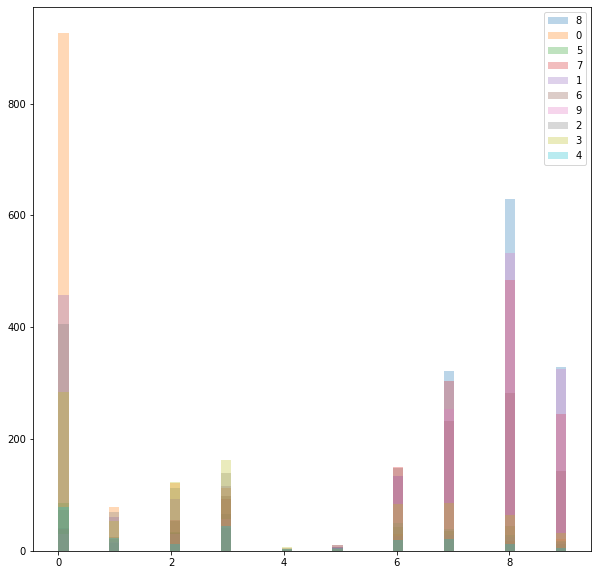

In [ ]:
# Histogram

preds_for_rating_clf = defaultdict(list)

for p, r in zip(preds_clf, y_test):
    preds_for_rating_clf[r].append(p)

#print(preds_for_rating.values())
#plt.plot(preds_for_rating.keys(), preds_for_rating.values())

legend = []

for true_r, pred_rs in preds_for_rating_clf.items():
    plt.hist(pred_rs, bins = 50, alpha = 0.3)
    legend.append(str(true_r))

plt.legend(legend)
plt.show()